In [4]:
import pandas
url = 'https://raw.githubusercontent.com/Coaxecva/Data-Science-Analytics-in-Python-Workshop-UoM-CS-Dept/master/data/iris.csv'
df = pandas.read_csv(url)
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [5]:
first_row = df.iloc[0]

In [6]:
first_row

SepalLength       5.1
SepalWidth        3.5
PetalLength       1.4
PetalWidth        0.2
Species        setosa
Name: 0, dtype: object

In [7]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [8]:
df.SepalLength.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

In [9]:
a = df.SepalLength>5.84
a.head()

0    False
1    False
2    False
3    False
4    False
Name: SepalLength, dtype: bool

In [10]:
b = [False]*150
b[0] = b[2] = True
df3 = df[b]
df3

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa

In [11]:
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [12]:
b = df[(df.SepalLength > df.SepalLength.mean()) & (df.Species == 'virginica')]
df.SepalLength.mean()

5.843333333333335

In [13]:
b.head()

SepalLength  SepalWidth  PetalLength  PetalWidth    Species
100          6.3         3.3          6.0         2.5  virginica
102          7.1         3.0          5.9         2.1  virginica
103          6.3         2.9          5.6         1.8  virginica
104          6.5         3.0          5.8         2.2  virginica
105          7.6         3.0          6.6         2.1  virginica

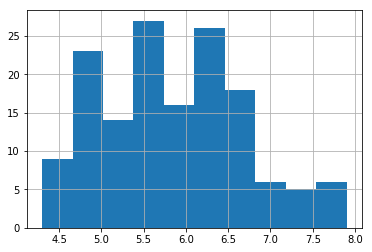

In [14]:
from matplotlib import pyplot
df.SepalLength.hist()

In [15]:
# Compute the average sepal lengths, petal lengths, etc. of data in each species
df4 = df.groupby('Species').mean()
df4

SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

In [16]:
df4.iloc[0]

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [17]:
df4.loc['setosa']

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [18]:
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
#X = df[['SepalLength','SepalWidth']]
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
model = KMeans(n_clusters=3)
model.fit(X)
print(adjusted_rand_score(model.labels_, df.Species))
print(silhouette_score(X, model.labels_))

0.7302382722834697
0.5528190123564101


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
X2 = pca.fit_transform(features)
model.fit(X2)
print(adjusted_rand_score(model.labels_, df.Species))

0.7163421126838475


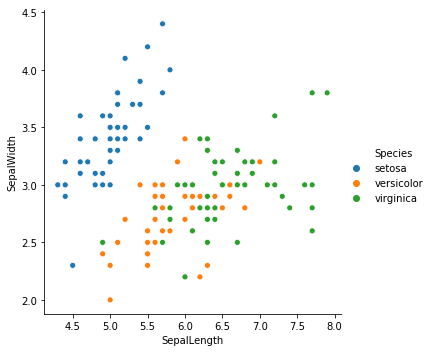

In [21]:
import seaborn
seaborn.relplot(x='SepalLength', y='SepalWidth', hue='Species', data=df)

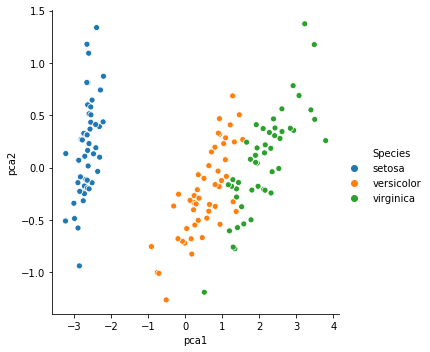

In [23]:
df['pca1'] = X2[:,0]
df['pca2'] = X2[:,1]
seaborn.relplot(x='pca1', y='pca2', hue='Species', data=df)

# Singular Value Decomposition (SVD)

SVD is a specific way of factoring a matrix

$M = U \Sigma V^t$

where $\Sigma$ is a diagonal matrix, composed of eigenvectors.

In [16]:
import numpy

class Matrix:
	def __init__(self, name, rows, cols):
		self.name = name
		self.rows = rows
		self.cols = cols
		self.mat = numpy.zeros([len(rows), len(cols)])

	def set(self, row_i, value):
		self.mat[row_i] = value

	def show(self):
		W = 15
		print(self.name)
		print(' '*W, end='')
		for c in self.cols:
			print(' '*(W-len(c)), end='')
			print(c, end='')
		print()
		for i, r in enumerate(self.rows):
			print(self.rows[i], end='')
			print(' '*(W-len(self.rows[i])), end='')
			for j in range(len(self.cols)):
				print('{:10.1f}'.format(self.mat[i][j]), end='\t')
			print()
		print()


M = Matrix(
    'Data',
    ['Joe', 'Jim', 'John', 'Jack', 'Jill', 'Jenny', 'Jane'],
    ['Matrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic'],
)
M.set(0, [1,1,1,0,0])
M.set(1, [3,3,3,0,0])
M.set(2, [4,4,4,0,0])
M.set(3, [5,5,5,0,0])
M.set(4, [0,0,0,4,4])
M.set(5, [0,0,0,5,5])
M.set(6, [0,0,0,2,2])
M.show()

Data
                        Matrix          Alien       StarWars     Casablanca        Titanic
Joe                   1.0	       1.0	       1.0	       0.0	       0.0	
Jim                   3.0	       3.0	       3.0	       0.0	       0.0	
John                  4.0	       4.0	       4.0	       0.0	       0.0	
Jack                  5.0	       5.0	       5.0	       0.0	       0.0	
Jill                  0.0	       0.0	       0.0	       4.0	       4.0	
Jenny                 0.0	       0.0	       0.0	       5.0	       5.0	
Jane                  0.0	       0.0	       0.0	       2.0	       2.0	



In [30]:
U, s, V = numpy.linalg.svd(M.mat, full_matrices=False)
print(U, s, V)
numpy.linalg.matrix_rank(M.mat)

[[-0.14002801  0.          0.41748286 -0.56011203 -0.42008403]
 [-0.42008403  0.          0.15383647 -0.20639328  0.84520504]
 [-0.56011203  0.          0.20511529  0.72480896 -0.20639328]
 [-0.70014004  0.         -0.33989068 -0.3439888  -0.2579916 ]
 [ 0.         -0.59628479  0.64444444  0.          0.        ]
 [ 0.         -0.74535599 -0.44444444  0.          0.        ]
 [ 0.         -0.2981424  -0.17777778  0.          0.        ]] [12.36931688  9.48683298  0.          0.          0.        ] [[-0.57735027 -0.57735027 -0.57735027  0.          0.        ]
 [-0.         -0.         -0.         -0.70710678 -0.70710678]
 [ 0.          0.          0.         -0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]]


2

In [31]:
U.dot(numpy.diag(s)).dot(V)

array([[1., 1., 1., 0., 0.],
       [3., 3., 3., 0., 0.],
       [4., 4., 4., 0., 0.],
       [5., 5., 5., 0., 0.],
       [0., 0., 0., 4., 4.],
       [0., 0., 0., 5., 5.],
       [0., 0., 0., 2., 2.]])

In [37]:
U2 = U[:, 0:2]
S2 = numpy.diag(s)[0:2, 0:2]
V2 = V[0:2, :]
U2.dot(S2).dot(V2)

array([[1., 1., 1., 0., 0.],
       [3., 3., 3., 0., 0.],
       [4., 4., 4., 0., 0.],
       [5., 5., 5., 0., 0.],
       [0., 0., 0., 4., 4.],
       [0., 0., 0., 5., 5.],
       [0., 0., 0., 2., 2.]])

In [38]:
M.set(4, [0,2,0,4,4])
M.set(6, [0,1,0,2,2])
M.show()

Data
                        Matrix          Alien       StarWars     Casablanca        Titanic
Joe                   1.0	       1.0	       1.0	       0.0	       0.0	
Jim                   3.0	       3.0	       3.0	       0.0	       0.0	
John                  4.0	       4.0	       4.0	       0.0	       0.0	
Jack                  5.0	       5.0	       5.0	       0.0	       0.0	
Jill                  0.0	       2.0	       0.0	       4.0	       4.0	
Jenny                 0.0	       0.0	       0.0	       5.0	       5.0	
Jane                  0.0	       1.0	       0.0	       2.0	       2.0	

